## Camera Heights

Notebook to examine the camera_height paramter from the image metadata in depth

In [23]:
import ipywidgets as widgets
import xdcm_dash_functions as f
from matplotlib import rcParams

%load_ext autoreload
%autoreload 2
%matplotlib inline

from xdcm_dash_functions import *

"""
Colorization and visualization utilities.
"""

import numpy as np
import skimage.transform as skt

#from brtlearn.shared import config
PIX_DATA_CLASS_DIRT = 0
PIX_DATA_CLASS_WEED = 1
PIX_DATA_CLASS_CROP = 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from datetime import datetime

# filter out images that are not NRG (e.g no RGB images), robots that are not DCMS and images with no crop label. 
filters = {"artifacts.kind": "nrg", "crop_name": {"$in": ['CORN', 'COTTON', 'SOYBEANS']}, 
           "robot_name": {"$in": ["DCM-MANATEE","DCM-OTTER","DCM-DOLPHIN", "DCM-WALRUS", "DCM-PORPOISE", "DCM-SEAL"]} }
start = datetime(2020, 3,7)
full_df, elapsed_time = f.get_shasta_data(filters=filters, start=start)
full_df['date_collected'] = pd.to_datetime(full_df['collected_on'].dt.date)
print(f"Queried {len(full_df)} images in {elapsed_time:.2f} s.")

2020-07-22 12:04:55,762 - APIRequestor - ERROR - API Authentication failed. rcode: 401, message: b'{"message":"Invalid OAuth access token"}\n'
2020-07-22 12:04:55,762 - APIRequestor - INFO - API access token expired. Refreshing tokens now.


Queried 504643 images in 373.02 s.


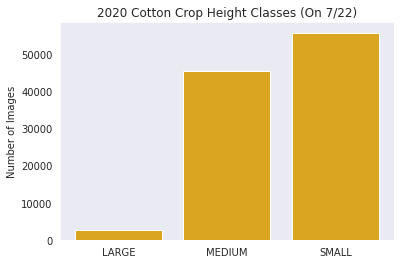

crop_height
LARGE      2597
MEDIUM    45580
SMALL     55823
Name: _id, dtype: int64

In [34]:
qdf = full_df.copy()
qdf = qdf[qdf['crop_name']=='COTTON']

ch_classes = qdf.groupby('crop_height').count()['_id']
plt.title('2020 Cotton Crop Height Classes (On 7/22)')
plt.bar(ch_classes.index, ch_classes, color='goldenrod')
plt.ylabel('Number of Images')
plt.savefig('cotton_size.png')

plt.show()

ch_classes

In [25]:
# Derive Crop Height from Camera Height
qdf = full_df.copy()
sns.set_style('dark')
qdf =qdf[qdf['crop_name']=='COTTON']

qdf['camera_height_inches'] = qdf.camera_height*39.37 # Convert camera_height from meters to inches
qdf = qdf.groupby(['grower', 'farm', 'operating_field_name', 'crop_name','robot_name','camera_height']).count()['_id']
qdf = pd.DataFrame(qdf).reset_index()
qdf = qdf.set_index('grower')
qdf['grower_name'] = qdf.index

qdf['camera_height_in'] = qdf.camera_height*39.37

names = qdf['operating_field_name'].unique()
print(len(names))

min_height = []
max_height = []
n_heights = []

for n in names:
    ofn = qdf[qdf['operating_field_name']==n]
    heights = ofn['camera_height_in'].unique()
    n_heights.append(len(heights))
    max_height.append(max(heights))
    min_height.append(min(heights))

ch = pd.DataFrame({'field':names, 'n_heights':n_heights, 'max_height':max_height, 'min_height':min_height})
print(ch.groupby('n_heights').count()['field'])
#ch[ch['n_heights'] == 3

ch = ch[ch['max_height']<200]
ch['putative_crop_height'] = ch['min_height']- 40
ch['put_2'] = ch['max_height'] -60
ch=ch[ch['n_heights']==3]

170
n_heights
1      8
2      3
3    151
4      2
5      5
6      1
Name: field, dtype: int64


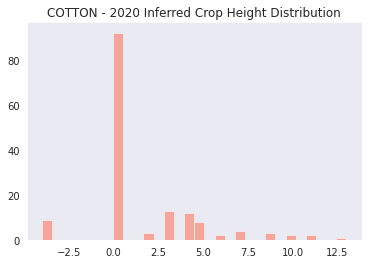

In [27]:
#plt.hist(ch['putative_crop_height'], bins=30, alpha=0.5)
plt.hist(ch['put_2'], bins=30, color='tomato', alpha=0.5)
plt.title('COTTON - 2020 Inferred Crop Height Distribution')
#plt.savefig('soybean camera height.png')
plt.show()

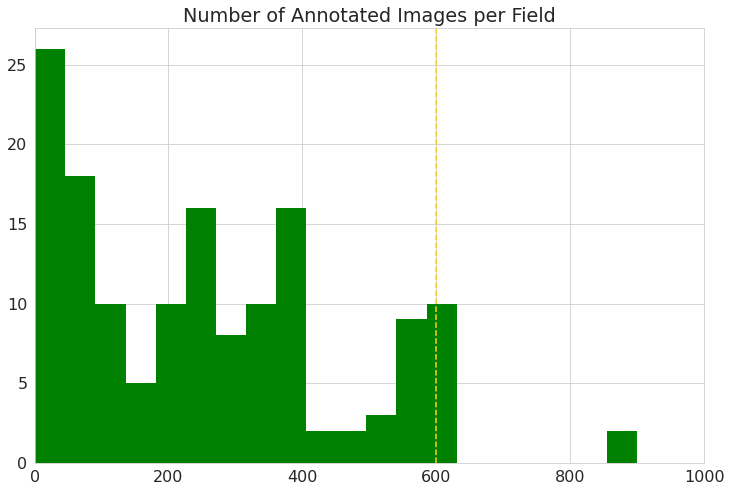

_id  is_deleted  \
grower       farm          operating_field_name                     
Ryan Bergman ISU/JDTIC     Agronomy Strip Trials  900         900   
                           JDTIC                  879         879   
condrey      condrey farms c72                    601         601   

                                                  collected_on  gnss  \
grower       farm          operating_field_name                        
Ryan Bergman ISU/JDTIC     Agronomy Strip Trials           900   900   
                           JDTIC                           879   879   
condrey      condrey farms c72                             601   601   

                                                  annotations  artifacts  \
grower       farm          operating_field_name                            
Ryan Bergman ISU/JDTIC     Agronomy Strip Trials          900        900   
                           JDTIC                          879        879   
condrey      condrey farms c72                            601        601   

                                                  has_human_annotation  uuid  \
grower       farm          operating_field_name                                
Ryan Bergman ISU/JDTIC     Agronomy Strip Trials                   900   900   
                           JDTIC                                   879   879   
condrey      condrey farms c72                                     601   601   

                                                  angle_to_row  \
grower       farm          operating_field_name                  
Ryan Bergman ISU/JDTIC     Agronomy Strip Trials           900   
                           JDTIC                           879   
condrey      condrey farms c72                             601   

                                                  camera_exposure_algo  ...  \
grower       farm          operating_field_name                         ...   
Ryan Bergman ISU/JDTIC     Agronomy Strip Trials                   900  ...   
                           JDTIC                                   879  ...   
condrey      condrey farms c72                                     601  ...   

                                                  robot_name  \
grower       farm          operating_field_name                
Ryan Bergman ISU/JDTIC     Agronomy Strip Trials         900   
                           JDTIC                         879   
condrey      condrey farms c72                           601   

                                                  artifacts_content_hash  \
grower       farm          operating_field_name                            
Ryan Bergman ISU/JDTIC     Agronomy Strip Trials                     900   
                           JDTIC                                     879   
condrey      condrey farms c72                                       601   

                                                  camera_height  camera_ppi  \
grower       farm          operating_field_name                               
Ryan Bergman ISU/JDTIC     Agronomy Strip Trials            900         900   
                           JDTIC                            879         879   
condrey      condrey farms c72                              601         601   

                                                  gps_quality  isp_version  \
grower       farm          operating_field_name                              
Ryan Bergman ISU/JDTIC     Agronomy Strip Trials          900          900   
                           JDTIC                          879          879   
condrey      condrey farms c72                            601          601   

                                                  latitude  longitude  notes  \
grower       farm          operating_field_name                                
Ryan Bergman ISU/JDTIC     Agronomy Strip Trials       900        900    900   
                           JDTIC                       879        879      0   
condrey      condrey farm

In [17]:
# ARe we annotating more than 600 images per field?

from matplotlib import rcParams

rcParams['font.size'] = 16

qdf = full_df.copy()
an =qdf[qdf['has_human_annotation'] == True]

an_fields = an.groupby(['grower', 'farm', 'operating_field_name']).count()

sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('Number of Annotated Images per Field')
plt.xlim(0,1000)
plt.hist(an_fields['_id'], bins=20, color='green', linewidth=0)
plt.savefig('annotations.png')
plt.axvline(600, linestyle='--', color='gold')
plt.show()


over = an_fields[an_fields['_id']>600]
over

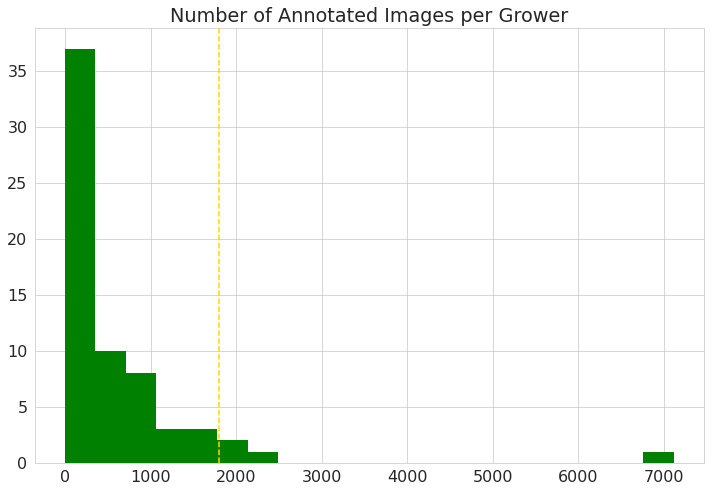

grower          crop_name
greenway coop   SOYBEANS     7114
hoelscher bros  CORN         1828
shewmaker       COTTON       1821
skiles          CORN         2185
Name: _id, dtype: int64

In [23]:
# Are we annotating more than 1800 images for any grower/crop combination?

qdf = full_df.copy()
an =qdf[qdf['has_human_annotation'] == True]

an_growers = an.groupby(['grower','crop_name']).count()

sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('Number of Annotated Images per Grower')
#plt.xlim(0,1000)
plt.hist(an_growers['_id'], bins=20, color='green', linewidth=0)
plt.savefig('annotations_grower.png')
plt.axvline(1800, linestyle='--', color='gold')
plt.show()

overg = an_growers[an_growers['_id']>1800]
overg['_id']

## Table of Camera Heights that put them into three classes: Low, Medium and High

In [14]:
# Table of Camera Heights, Number of Images and Number of Annotated Images

def cam_classes(x):
    """
    Classifies the different camera_height values into a 3-tiered range of classes
    """
    if x <50:
        return "LOW"
    elif (x >=50) & (x<=60):
        return "MEDIUM"
    elif x > 60:
        return "HIGH"
    
qdf = full_df.copy()
annotated = qdf[qdf['has_human_annotation'] == True] # Select All Images With Human Annotation

qdf = qdf.groupby(['grower', 'farm', 'operating_field_name', 'crop_name','robot_name','camera_height']).count()['_id']
qdf = pd.DataFrame(qdf).reset_index()
qdf['camera_height_inches'] = qdf.camera_height*39.37 # Convert camera_height from meters to inches
qdf['camera_height_class'] = qdf.camera_height_inches.apply(cam_classes) # Classify camera_height into three classes
qdf = qdf.set_index('grower')
qdf['grower_name'] = qdf.index # Create a copy of the index to insert later.

# There are at least 1466 annotated images that do not have camera_height values associated with them
# These were all from QR code tests and can be safely ignored
annotated['camera_height_inches'] = annotated.camera_height*39.37
annotated['camera_height_class'] = annotated.camera_height_inches.apply(cam_classes)
annotated = annotated.groupby(['grower', 'farm', 'operating_field_name','crop_name','robot_name','camera_height']).count()['has_human_annotation']
annotated = pd.DataFrame(annotated).reset_index()
annotated = annotated.set_index('grower')
images = pd.merge(qdf, annotated, how='left') # Merge original df with annotated images df

print(f'There are {len(qdf)} total field - height combinations')
print(f'There are {len(annotated)} annotated fields')
print(f'The final images dataframe has {len(images)} total fields')
#images.to_csv('images.csv')
images.index

There are 766 total field - height combinations
There are 252 annotated fields
The final images dataframe has 766 total fields


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            756, 757, 758, 759, 760, 761, 762, 763, 764, 765],
           dtype='int64', length=766)

In [42]:
# Second Cell of Camera Height Processing
# Pivot images dataframe to move camera_height_class into the columns.
#print(images.columns)
pivot = images[['camera_height_class', '_id', 'has_human_annotation', 'robot_name']]
print(pivot.columns)
pivot.rename(columns={'_id': 'num_images'}, inplace=True)
fields = images[['robot_name','grower_name', 'farm', 'operating_field_name']] 
print(fields.columns)

pivot = pivot.pivot(columns='camera_height_class', values = ['num_images', 'has_human_annotation'])
print(pivot.columns)
pivot = pivot.fillna(0)
joined = pd.concat([fields, pivot], axis=1)
joined = joined.groupby([ 'robot_name','grower_name', 'farm', 'operating_field_name']).sum()
joined.to_csv('annoted_images_by_camera_height.csv')

print(f'Are the pivot table and field identifiers the same length?: {len(pivot)==len(fields)}, They are pivot={len(pivot)}, fields={len(fields)}')

Index(['camera_height_class', '_id', 'has_human_annotation', 'robot_name'], dtype='object')
Index(['robot_name', 'grower_name', 'farm', 'operating_field_name'], dtype='object')
MultiIndex([(          'num_images',   'HIGH'),
            (          'num_images',    'LOW'),
            (          'num_images', 'MEDIUM'),
            ('has_human_annotation',   'HIGH'),
            ('has_human_annotation',    'LOW'),
            ('has_human_annotation', 'MEDIUM')],
           names=[None, 'camera_height_class'])
Are the pivot table and field identifiers the same length?: True, They are pivot=766, fields=766


In [50]:
robots= joined.reset_index()
#print(robots.columns)
#robots.columns = robots.columns.str.replace('\'','')
print(robots.info())
#robots['total_images'] = robots['(\'num_images\', \'HIGH\'')'] #+robots['('num_images', 'LOW')'] + robots['('num_images', 'MEDIUM')']

#plt.hist()
#plt.show()
robots.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   robot_name                      312 non-null    object 
 1   grower_name                     312 non-null    object 
 2   farm                            312 non-null    object 
 3   operating_field_name            312 non-null    object 
 4   (num_images, HIGH)              312 non-null    float64
 5   (num_images, LOW)               312 non-null    float64
 6   (num_images, MEDIUM)            312 non-null    float64
 7   (has_human_annotation, HIGH)    312 non-null    float64
 8   (has_human_annotation, LOW)     312 non-null    float64
 9   (has_human_annotation, MEDIUM)  312 non-null    float64
dtypes: float64(6), object(4)
memory usage: 24.5+ KB
None


,robot_name,grower_name,farm,operating_field_name,"(num_images, HIGH)","(num_images, LOW)","(num_images, MEDIUM)","(has_human_annotation, HIGH)","(has_human_annotation, LOW)","(has_human_annotation, MEDIUM)"
0,DCM-DOLPHIN,123,123,123,13.0,0.0,0.0,0.0,0.0,0.0
1,DCM-DOLPHIN,31,321,321,557.0,0.0,0.0,0.0,0.0,0.0
2,DCM-DOLPHIN,Andy Kipker,Baileys,Van Gorder rd,0.0,54.0,0.0,0.0,0.0,0.0
3,DCM-DOLPHIN,Andy Kipker,Redman,Mountain,0.0,55.0,0.0,0.0,0.0,0.0
4,DCM-DOLPHIN,Andy Kipker,Redman,Rogers,0.0,63.0,0.0,0.0,0.0,0.0


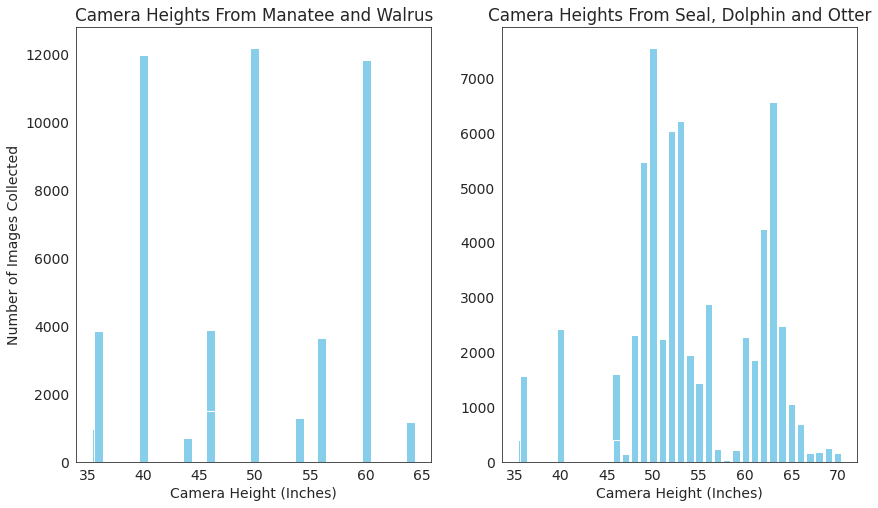

In [49]:
# Plot Camera Heights For Each of the DCMs

rcParams['font.size'] = 14
mdf = full_df.copy()
mdf['cam_height_inches'] = (mdf['camera_height']*39.37)
sns.set_style('white')

dcm_list = ["DCM-MANATEE","DCM-OTTER","DCM-DOLPHIN", "DCM-WALRUS", "DCM-PORPOISE", "DCM-SEAL"]

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
qdf = mdf[mdf['robot_name'].isin(["DCM-MANATEE", "DCM-WALRUS"])]
qdf = qdf.groupby('cam_height_inches').count()['_id']
qdf= qdf[qdf.index <90]

plt.bar(qdf.index, qdf, color='skyblue')
plt.title('Camera Heights From Manatee and Walrus')
plt.ylabel('Number of Images Collected')
plt.xlabel('Camera Height (Inches)')

qdf = mdf[mdf['robot_name'].isin(["DCM-SEAL", "DCM-DOLPHIN", "DCM-OTTER"])]
qdf = qdf.groupby('cam_height_inches').count()['_id']
qdf= qdf[qdf.index <80]
plt.subplot(1,2,2)
plt.bar(qdf.index, qdf, color='skyblue')
plt.title('Camera Heights From Seal, Dolphin and Otter')
plt.xlabel('Camera Height (Inches)')
plt.savefig('dcm_camera_heights.png')
plt.show()

In [ ]:
# Number of Images per field/camera_height combination

qdf = full_df[full_df['crop_name'].isin(['COTTON', 'SOYBEANS', 'CORN'])] # Filter out non-crop fields
qdf=qdf[qdf['date_collected'] > '2020-06-14']

fdf = qdf[qdf['grower'] != 'greenway coop'] # Filter Out Bradley Field Data From Arkansas 
qdf = qdf.groupby(['grower', 'farm', 'operating_field_name', 'camera_height']).count()
compliant_fields = len(qdf[qdf['_id'] >= 200])
print(f'There are {len(qdf)} total field/camera_height combinations, with an average of {(len(fdf)/len(qdf)):.2f} images per field/camera height combination')
print(f'There are {compliant_fields} field/camera height combinations that meet the 200 image threshold, or {(compliant_fields/len(qdf))*100:.2f}% of all combinations')

plt.figure(figsize=(12,8))
plt.axvline(200, linestyle= '--', color='tomato', linewidth=4)
plt.title('Number of Images per Field/Camera Height Combination')
plt.legend(['200 Image Goal'])
plt.hist(qdf['_id'], bins =50, color='forestgreen')
plt.xlim(0,800)
#plt.savefig('images_per_camera_height.png')
plt.show()